In [2]:
# Computational Physics Project 4 - Molecular Orbital Theory
# Ben Zager, Zach Faber-Manning, Michael Rosen

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.linalg import eigh,solve


In [93]:
# eigenvalues -> a + b*eig(adj)

a = -10 # 
b = -1 # 
N = 6 # number of carbons
Ne = N # number of electrons

# adjacency matrix of carbons
#adj = np.array([[0,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0]]) # butadiene (N=4)
adj = np.array([[0,1,0,0,0,1],[1,0,1,0,0,0],[0,1,0,1,0,0],[0,0,1,0,1,0],[0,0,0,1,0,1],[1,0,0,0,1,0]]) # benzene (N=6)
#adj = np.array([[0,1],[1,0]]) # ethylene (N=2)

H = a*np.identity(N) + b*adj # Hamiltonian

eigs = eigh(adj)
evals = np.around(eigs[0],4) # eigenvalues
evecs = np.around(eigs[1],4) # eigenvectors

print("Eigenvalues\n")
for i in range(N):
    print(str(i+1)+" : a + "+str(np.around(evals[i],3))+"b  " + str(np.around(evecs[:,i],3)))


Eigenvalues

1 : a + -2.0b  [ 0.408 -0.408  0.408 -0.408  0.408 -0.408]
2 : a + -1.0b  [ 0.577 -0.289 -0.289  0.577 -0.289 -0.289]
3 : a + -1.0b  [ 0.   0.5 -0.5  0.   0.5 -0.5]
4 : a + 1.0b  [ 0.  -0.5 -0.5  0.   0.5  0.5]
5 : a + 1.0b  [ 0.577  0.289 -0.289 -0.577 -0.289  0.289]
6 : a + 2.0b  [-0.408 -0.408 -0.408 -0.408 -0.408 -0.408]


[-2. -2. -1. -1. -1. -1.  1.]


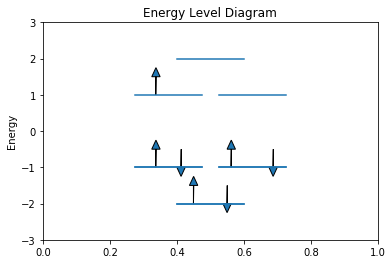

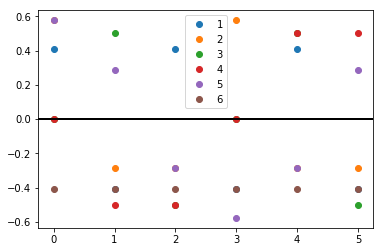

In [95]:
# 
        
# parameters for drawing diagram
mid = 0.5 # 
width = 0.2 # 
space = 0.05 #
arrlen = 0.5 # arrow length

uniq = np.unique(np.around(evals,4),return_counts=True)
energies = np.zeros(Ne)

# draw energy level diagram
filled = 0
for i in range(uniq[0].size):
    y = uniq[0][i] #*b + a
    m = uniq[1][i]
    start = mid - 0.5*(m-1)*(width+space)
    
    turn = 1
    j = 0
    while j < m:
        xL = start + j*(width+space) - 0.5*width
        xR = xL + width
        plt.axhline(y,xmin=xL,xmax=xR)
        if filled < Ne:
            energies[filled] = y
            if turn == 1:
                elec = 0.9*np.mean([xL,xR])
                plt.arrow(elec,y,0,arrlen,head_width=0.025,head_length=0.25)
                filled += 1
                if j == m-1:
                    turn = 2
                    j = 0
                    continue
            elif turn == 2:
                elec = 1.1*np.mean([xL,xR])
                plt.arrow(elec,y+arrlen,0,-arrlen,head_width=0.025,head_length=0.25)
                filled += 1
        j += 1

print(energies)
plt.ylabel("Energy")
plt.xlim([0,1])
plt.ylim([np.min(evals)-1,np.max(evals)+1])
plt.title("Energy Level Diagram")
plt.show()

for i in range(N):
    plt.axhline(0,color='k')
    plt.plot(evecs[:,i],'o',label=str(i+1))

plt.legend()
plt.show()

In [ ]:
# Delocalization energy
# energy difference from ground state and two isolated double bonds (compare to ethylene)



In [ ]:
# Charge density estimation 
# for single electron in orbital I, |c_Ir|^2 is probability of electron being on atom r



In [ ]:
# Bond order calculation

